# Group 13

# Installing Necessary Packages

In [1]:
!pip install scikit-learn==1.3.2 --upgrade
!pip install pandas
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Importing Packages

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import numpy as np
import pickle
import os
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Loading Training Dataset

In [3]:
dataset_df = pd.read_csv('dataset/data.csv')

In [4]:
dataset_df.shape

(569, 33)

# Exploratory Data Analysis

In [5]:
dataset_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#All columns except 'Unnamed' are complete. The 'Unnamed' column, having 569 empty entries equivalent to the total number of rows,
#contains no useful data and can be safely removed.
#dropping the column with all missing values
dataset_df = dataset_df.dropna(axis=1)

In [7]:
dataset_df.shape

(569, 32)

In [8]:
#checking datatypes
dataset_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
#Display a count of Malignant (M) or Benign (B) cells
dataset_df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='diagnosis'>

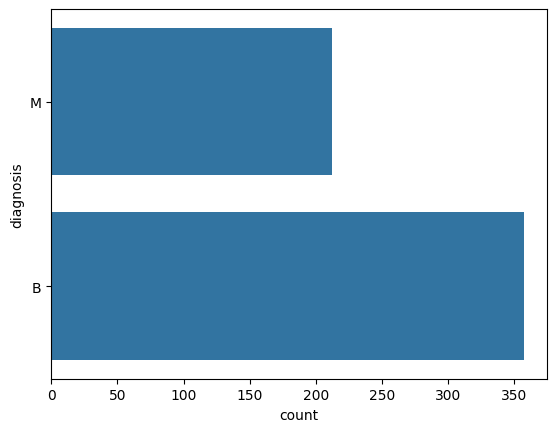

In [10]:
sns.countplot(dataset_df['diagnosis'], label = 'count')

# Splitting the dataset into features (X) and target variable (y)

In [11]:
label_encoder = LabelEncoder()
# Generate synthetic demographic data
num_samples = dataset_df.shape[0]  # Assuming the same number of samples as in the original dataset
demographic_feature1 = np.random.randint(18, 90, size=num_samples)  # Age
demographic_feature2 = np.random.choice(['Male', 'Female'], size=num_samples)  # Gender

# Generate synthetic genetic data
genetic_feature1 = np.random.rand(num_samples)  # Example of a continuous genetic feature
genetic_feature2 = np.random.choice(['AA', 'AB', 'BB'], size=num_samples)  # Example of a categorical genetic feature
# demographic_feature1 = label_encoder.fit_transform(demographic_feature1)
demographic_feature2 = label_encoder.fit_transform(demographic_feature2)
genetic_feature2 = label_encoder.fit_transform(genetic_feature2)

synthetic_additional_data = pd.DataFrame({
    'demographic_feature1': demographic_feature1,
    'demographic_feature2': demographic_feature2,
    'genetic_feature1':genetic_feature1,
    'genetic_feature2':genetic_feature2
})

In [12]:
X = dataset_df.drop('diagnosis', axis=1)
y = dataset_df['diagnosis']

In [13]:
X_additional = synthetic_additional_data
X = pd.concat([X, X_additional], axis=1)

In [14]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,demographic_feature1,demographic_feature2,genetic_feature1,genetic_feature2
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,55,1,0.016747,2
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,80,1,0.162498,2
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,63,0,0.463223,2
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,18,1,0.314000,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,64,0,0.831123,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,24,0,0.937260,0
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,58,1,0.187252,0
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,42,1,0.462174,0
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,37,1,0.538898,1


# Encoding the target variable using LabelEncoder

In [15]:
y_encoded = label_encoder.fit_transform(y)

In [16]:
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

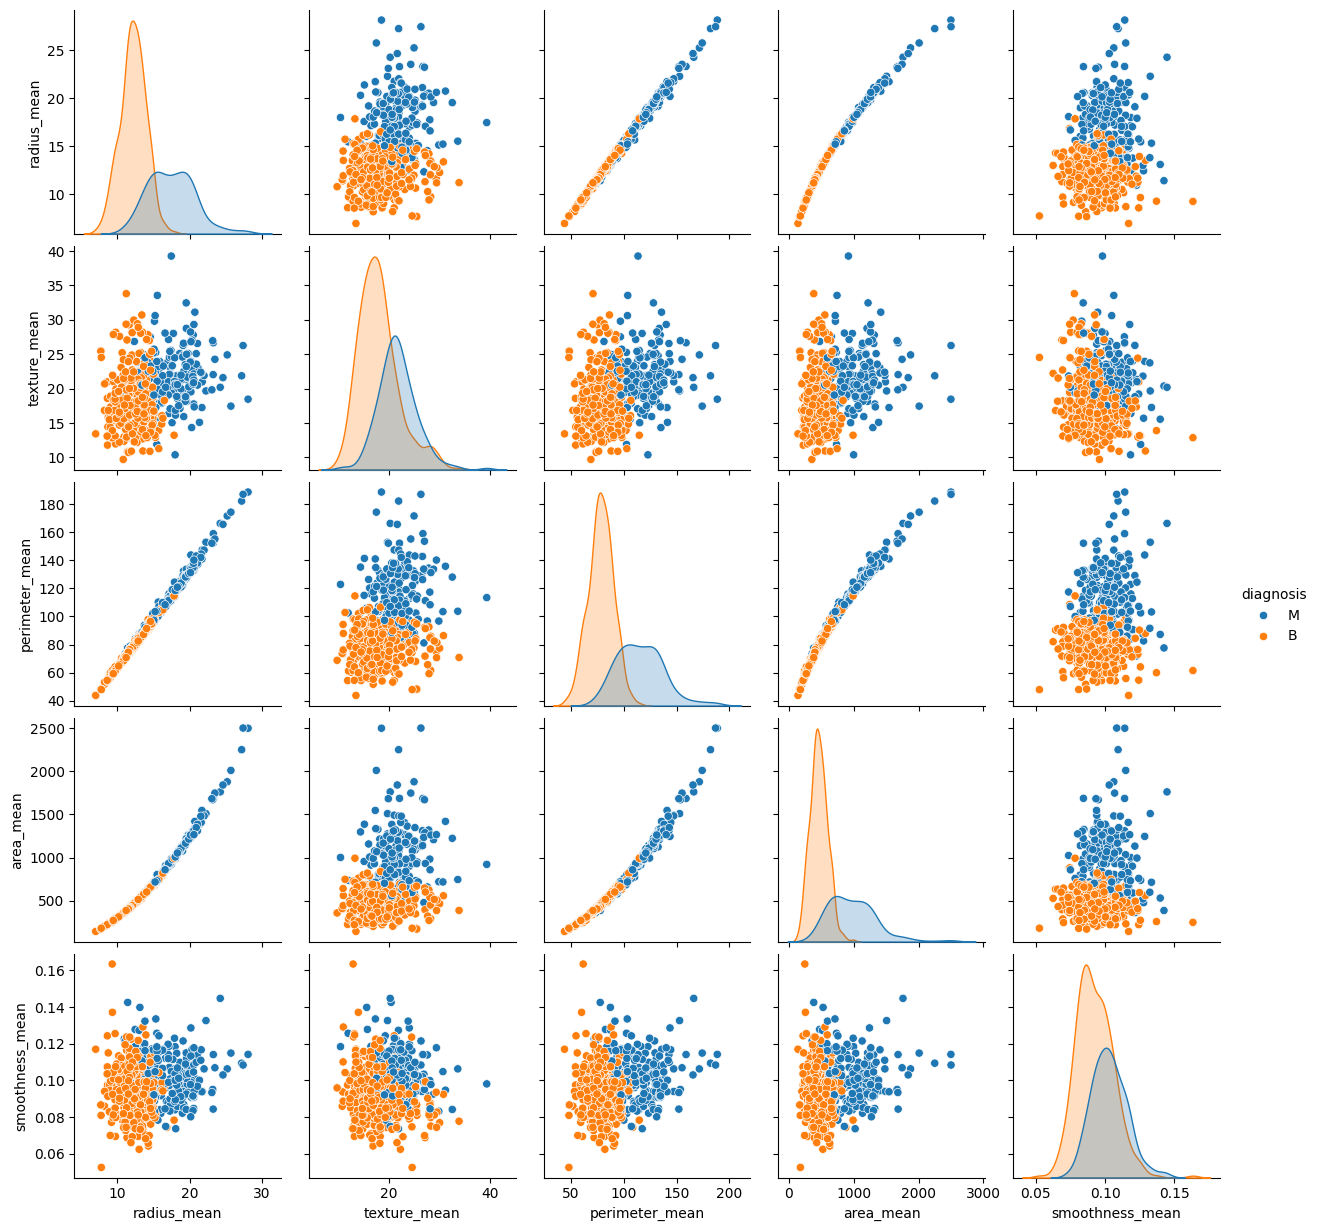

In [17]:
sns.pairplot(dataset_df.iloc[:,1:7], hue='diagnosis')

<Axes: >

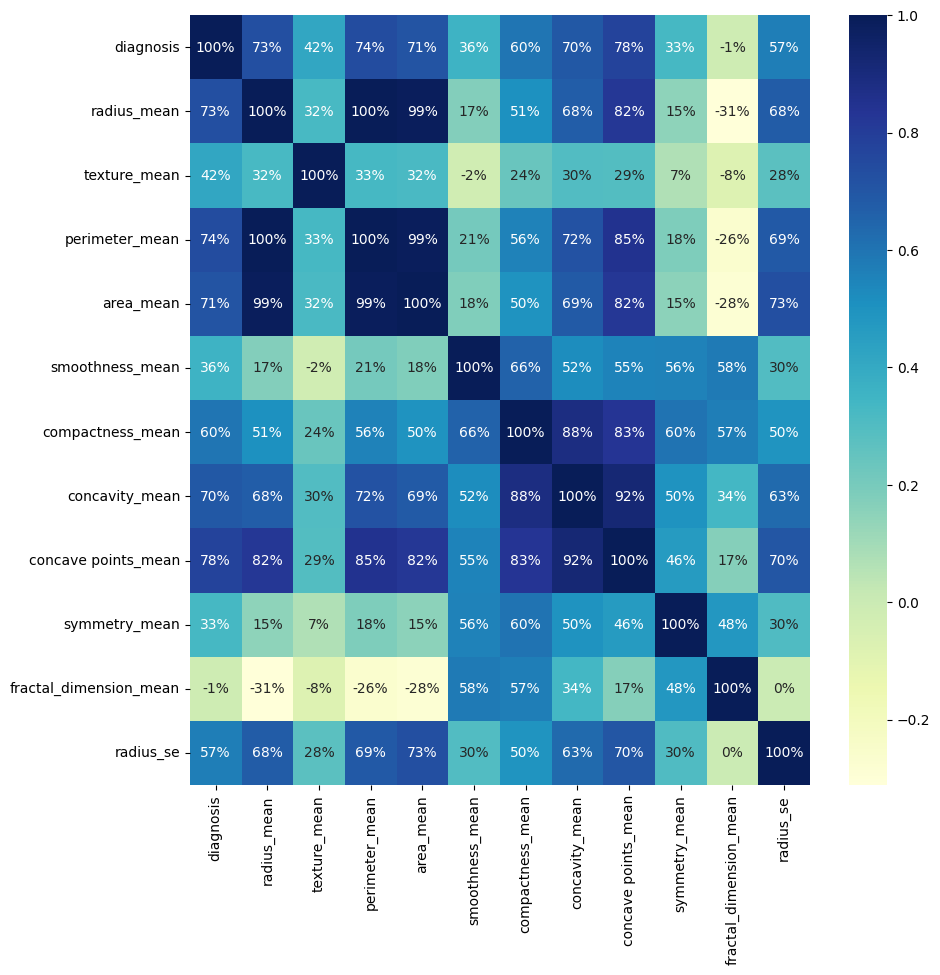

In [18]:
dataset_df['diagnosis'] =y_encoded
plt.figure(figsize=(10,10))
sns.heatmap(dataset_df.iloc[:,1:13].corr(), cmap="YlGnBu", annot=True, fmt='.0%')

# Splitting the dataset into training and testing sets


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=20)

In [20]:
# #scaling the dataset - feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

# Defining models to train

In [21]:
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion = 'entropy', random_state= 0),
    # "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators =100, criterion = 'entropy', random_state = 0),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=10),
    # "LogisticRegression": LogisticRegression(random_state=0)
}

# Training and evaluating each model

In [22]:
for model_name, model in models.items():
    # Fitting the model
    model.fit(X_train, y_train)
    
    # Making predictions
    if model_name == "KNeighbors":
        predictions = model.predict(X_test)
    else:
        predictions = model.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Saving the trained model
    with open("trainedmodels/" + model_name + '_.pkl', 'wb') as file:
        pickle.dump(model, file)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Printing results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(cm)
    print("="*40)

Model: DecisionTreeClassifier
Accuracy: 0.956140350877193
Confusion Matrix:
[[63  3]
 [ 2 46]]
Model: RandomForest
Accuracy: 0.9736842105263158
Confusion Matrix:
[[66  0]
 [ 3 45]]
Model: GradientBoosting
Accuracy: 0.9649122807017544
Confusion Matrix:
[[64  2]
 [ 2 46]]
Model: KNeighbors
Accuracy: 0.6929824561403509
Confusion Matrix:
[[63  3]
 [32 16]]


# Load trained

### Passing name like "DecisionTreeClassifier","SVC","RandomForest","GradientBoosting","KNeighbors","LogisticRegression"

In [23]:
# Function to load a selected model
def load_model(model_name):
    model_path = os.path.join("trainedmodels/"+model_name + "_.pkl")
    with open(model_path, 'rb') as model_file:
        model = pickle.load(model_file)
    return model

In [24]:
loaded_Model = load_model("DecisionTreeClassifier")
pred = loaded_Model.predict(X_test)
print('Our model prediction:')
print(pred)
print()
print('Actual prediction:')
print(y_test)

Our model prediction:
[0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1
 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 1 0]

Actual prediction:
[0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 1 0]


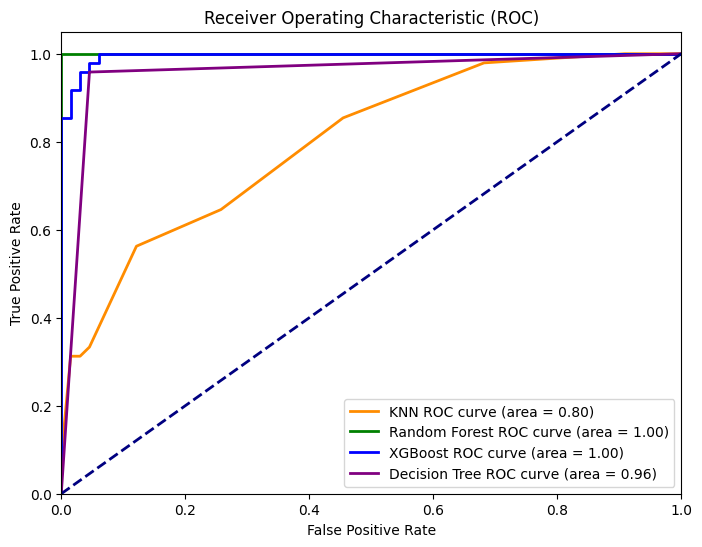

In [25]:
# Load models
knn_model = load_model("KNeighbors")
rf_model = load_model("RandomForest")
xgb_model = load_model("GradientBoosting")
dt_model = load_model("DecisionTreeClassifier")

# Calculate the probability scores for the positive class (1)
y_scores_knn = knn_model.predict_proba(X_test)[:, 1]
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]
y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_scores_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_scores_knn)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores_rf)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_scores_xgb)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_scores_dt)

# Calculate the area under the ROC curve (AUC)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='purple', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [27]:
class MyLogisticRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def _compute_cost(self, features, targets):
        """Cost function for logistic regression."""
        samples_count = len(targets)
        predictions = self._sigmoid(np.dot(features, self.weights) + self.bias)
        cost = -1/samples_count * np.sum(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions))
        return cost

    def _perform_gradient_descent(self, features, targets, learning_rate, iterations):
        """Gradient descent to optimize coefficients and intercept."""
        samples_count, features_count = features.shape
        self.weights = np.zeros(features_count)
        self.bias = 0.0
        for _ in range(iterations):
            predictions = self._sigmoid(np.dot(features, self.weights) + self.bias)
            d_weights = (1 / samples_count) * np.dot(features.T, (predictions - targets))
            d_bias = (1 / samples_count) * np.sum(predictions - targets)
            self.weights -= learning_rate * d_weights
            self.bias -= learning_rate * d_bias

    def fit(self, features, targets, learning_rate=0.01, iterations=20000):
        """Fit the logistic regression model."""
        self._perform_gradient_descent(features, targets, learning_rate, iterations)

    def predict(self, features):
        """Make predictions using the trained model."""
        predictions = self._sigmoid(np.dot(features, self.weights) + self.bias)
        return [1 if i > 0.5 else 0 for i in predictions]
    
    def predict_proba(self, features):
        """Predict probability estimates for samples."""
        probabilities = self._sigmoid(np.dot(features, self.weights) + self.bias)
        return np.column_stack((1 - probabilities, probabilities))

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score
import numpy as np

#Identify categorical and numeric columns


categorical_columns = ['demographic_feature2','genetic_feature2',]
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define preprocessing steps
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder()

# Define preprocessing pipeline
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('numeric', numerical_preprocessor, numerical_columns),
        ('categorical', categorical_preprocessor, categorical_columns)
    ])

# Define the model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('classifier', MyLogisticRegression())
])


In [29]:
#write your code here
# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
predictions = model_pipeline.predict(X_test)

In [30]:
# Evaluate the model
balanced_acc_score = balanced_accuracy_score(y_test, predictions)
print("Balanced Accuracy Score:", balanced_acc_score)

Balanced Accuracy Score: 0.9895833333333333


In [31]:
with open("trainedmodels/"+'MyLogisticRegression_.pkl', 'wb') as file:
        pickle.dump(model_pipeline, file)

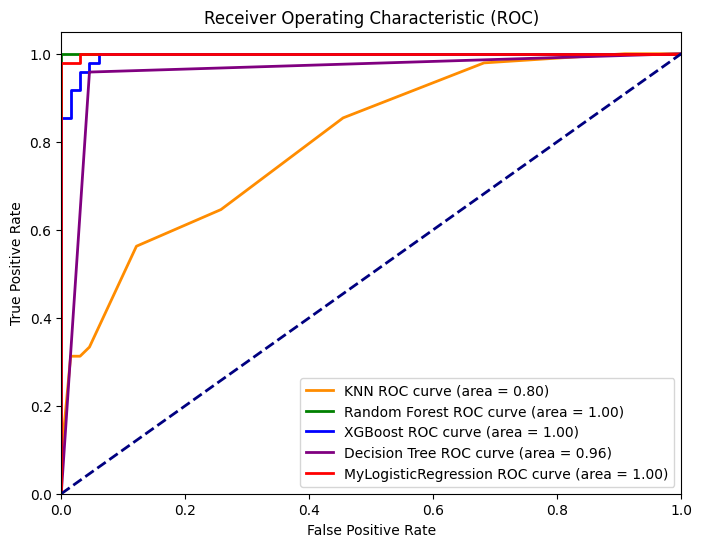

In [32]:
# Load MyLogisticRegression model
my_logistic_model = load_model("MyLogisticRegression")

# Make predictions using MyLogisticRegression
my_logistic_predictions = my_logistic_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve for MyLogisticRegression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, my_logistic_predictions)

# Calculate the AUC for MyLogisticRegression
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot the ROC curve for MyLogisticRegression along with other models
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='purple', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot(fpr_logistic, tpr_logistic, color='red', lw=2, label=f'MyLogisticRegression ROC curve (area = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Testing The Trained Model

In [59]:
sample_record = X_test.iloc[0:1]
sample_record

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,demographic_feature1,demographic_feature2,genetic_feature1,genetic_feature2
269,8910720,10.71,20.39,69.5,344.9,0.1082,0.1289,0.08448,0.02867,0.1668,...,0.1335,0.255,0.2534,0.086,0.2605,0.08701,46,0,0.804625,1


In [60]:
sample_prediction = my_logistic_model.predict(sample_record)
label_map = {0: 'Benign (B)', 1: 'Malignant (M)'}
prediction_label = label_map[sample_prediction[0]]

print("The selected record from X_test is predicted to be:", prediction_label)

The selected record from X_test is predicted to be: Benign (B)


In [61]:
sample_record = X_test.iloc[2:3]
sample_record

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,demographic_feature1,demographic_feature2,genetic_feature1,genetic_feature2
30,853401,18.63,25.11,124.8,1088.0,0.1064,0.1887,0.2319,0.1244,0.2183,...,0.1491,0.4257,0.6133,0.1848,0.3444,0.09782,42,1,0.860118,1


In [62]:
sample_prediction = my_logistic_model.predict(sample_record)
label_map = {0: 'Benign (B)', 1: 'Malignant (M)'}
prediction_label = label_map[sample_prediction[0]]

print("The selected record from X_test is predicted to be:", prediction_label)

The selected record from X_test is predicted to be: Malignant (M)
